In [139]:
import pandas as pd 
import os
import json
import torch 
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
print("Using", device, "device")
import torch
import spacy

print(torch.__version__)
print(spacy.__version__)

spacy.require_gpu() # require_gpu raises an error if no GPU is avail 
nlp = spacy.load("en_core_web_md")
import matplotlib.pyplot as plt


Using cuda device
1.13.0+cu116
3.7.4


## Using SpaCy tokenizer for english, for sentence length binning

In [140]:
def tokenize_en(str_):
    return(len(nlp.tokenizer(str_)))

## Get Data
Reading in data from one of my prev csv files

In [141]:
train_df = pd.read_csv(r"train data\train_en_zh.csv")
train_df

,en,zh
0,"Several years ago here at TED, Peter Skillman ...",几年前，在TED大会上， Peter Skillman 介绍了一个设计挑战 叫做“棉花糖挑战”
1,And the idea's pretty simple: Teams of four h...,是个非常简单的主意 要求一组四人的团队搭建一个独立的最高建筑 材料是20根意大利面条 一段胶...
2,The marshmallow has to be on top.,棉花糖必须放在最上面
3,"And, though it seems really simple, it's actua...",这虽然看似简单，其实并不容易 因为它要求人们 迅速地合作
4,"And so, I thought this was an interesting idea...",我觉得这是个有趣的主意 我把它放到了设计专题讨论会上
...,...,...
8544,"And the answer is, the ability to seek goals ...",答案是，寻找目标的能力 将直接遵循它， 道理是这样的： 就像你要穿过一条隧道， 你未来道路空...
8545,from a long-term drive to increase future fre...,长期的驱动， 为了增加未来的行动自由。
8546,"Finally, Richard Feynman, famous physicist, o...",最后，理查德 · 费曼， 这位著名的物理学家， 曾经写道， 如果人类文明被摧毁 并且你只能将...
8547,My equivalent of that statement to pass on to...,我与这句话等同的声明， 来传递给后代， 帮助他们建立人工智能 或是帮助他们理解 人类的智慧，...


In [142]:
count_df = train_df.copy()
count_df['EN_LEN'] = count_df['en'].apply(tokenize_en)

import pandas as pd
import matplotlib.pyplot as plt

# Assuming train_df['EN_LEN'] contains the sentence lengths

# Define the bins and labels
bins = [0, 20, 30, 40, 50, 60, float('inf')]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '60+']

# Categorize sentence lengths into bins
count_df['Length Category'] = pd.cut(count_df['EN_LEN'], bins=bins, labels=labels, right=False)

# Count how many entries fall into each category
counts_per_category = count_df['Length Category'].value_counts().sort_index()

print("Counts per category:")
print(counts_per_category)

Counts per category:
Length Category
0-20     4820
21-30    1877
31-40     990
41-50     429
51-60     232
60+       201
Name: count, dtype: int64


## Get chi translation results

In [143]:
PREDICTION_FILE = r"C:\Users\user\OneDrive\Documents\GitHub\cs4248-neural-translation\evaluations\predictions\230k-results\230k-base-lstm.json"
REFERENCE_FILE = r"C:\Users\user\OneDrive\Documents\GitHub\cs4248-neural-translation\tokenisation\data\iwslt2017-en-zh-test.zh"

predictions = []
reference = []

with open(f'{PREDICTION_FILE}', 'r', encoding='utf-8') as f:
    raw = f.read()
    pdict = json.loads(raw)
    if "predicted" in pdict:
        predictions = [*predictions, *pdict['predicted']]

with open(f'{REFERENCE_FILE}', 'r',encoding='utf-8') as f:
    reference = [*reference, *(f.readlines())]

assert len(predictions) == len(reference), \
    'Received a wrong number of predictions. ' + \
    'Ensure that you have generated predictions for the whole test set. \n\n' + \
    f'Predictions Length: {len(predictions)}, Expected: {len(reference)}' 

predictions = list(map(lambda s: s or '⁇', predictions))
refs = [[r] for r in reference]
sys = [str(p).rstrip() for p in predictions]

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\user\\OneDrive\\Documents\\GitHub\\cs4248-neural-translation\\evaluations\\predictions\\230k-base-lstm.json'

In [137]:
train_df['pred'] = sys

train_df

,en,zh,pred
0,"Several years ago here at TED, Peter Skillman ...",几年前，在TED大会上， Peter Skillman 介绍了一个设计挑战 叫做“棉花糖挑战”,▁And o ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁
1,And the idea's pretty simple: Teams of four h...,是个非常简单的主意 要求一组四人的团队搭建一个独立的最高建筑 材料是20根意大利面条 一段胶...,▁And o ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁
2,The marshmallow has to be on top.,棉花糖必须放在最上面,▁And o ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁
3,"And, though it seems really simple, it's actua...",这虽然看似简单，其实并不容易 因为它要求人们 迅速地合作,▁And o ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁
4,"And so, I thought this was an interesting idea...",我觉得这是个有趣的主意 我把它放到了设计专题讨论会上,▁And o ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁
...,...,...,...
8544,"And the answer is, the ability to seek goals ...",答案是，寻找目标的能力 将直接遵循它， 道理是这样的： 就像你要穿过一条隧道， 你未来道路空...,▁And o ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁
8545,from a long-term drive to increase future fre...,长期的驱动， 为了增加未来的行动自由。,▁And o ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁
8546,"Finally, Richard Feynman, famous physicist, o...",最后，理查德 · 费曼， 这位著名的物理学家， 曾经写道， 如果人类文明被摧毁 并且你只能将...,▁And o ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁
8547,My equivalent of that statement to pass on to...,我与这句话等同的声明， 来传递给后代， 帮助他们建立人工智能 或是帮助他们理解 人类的智慧，...,▁And o ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁ ▁


## Point to your indiv scores json

In [61]:

#files = os.listdir('.')
json_file_rnn = [r"C:\Users\user\OneDrive\Documents\GitHub\cs4248-neural-translation\evaluations\individual_scores\230k-base-lstm.json"] #230k_checkpoint_6.68.json"]
json_objects = []
counter = 0

for json_file in json_file_rnn:
    counter += 1
    print(f"{json_file[:-5]} : {counter}") 

    with open(json_file, 'r') as file:
        json_objects.append(json.load(file))

assert len(json_objects[0]['BLEU']) == len(json_objects[0]['BERTSCORE_F1']) == len(json_objects[0]['BERTSCORE_P']) == len(json_objects[0]['BERTSCORE_R']) == len(train_df), "lengths do not tally"



C:\Users\user\OneDrive\Documents\GitHub\cs4248-neural-translation\evaluations\individual_scores\230k-base-lstm : 1


## Prepare & save df for plot

In [62]:
train_df['BLEU'] = json_objects[0]['BLEU']
train_df['BERTSCORE_F1'] = json_objects[0]['BERTSCORE_F1']
train_df['BERTSCORE_P'] = json_objects[0]['BERTSCORE_P']
train_df['BERTSCORE_R'] = json_objects[0]['BERTSCORE_R']
train_df['EN_LEN'] = train_df['en'].apply(tokenize_en)

train_df

,en,zh,pred,BLEU,BERTSCORE_F1,BERTSCORE_P,BERTSCORE_R,EN_LEN
0,"Several years ago here at TED, Peter Skillman ...",几年前，在TED大会上， Peter Skillman 介绍了一个设计挑战 叫做“棉花糖挑战”,"这 是 从 这 ⁇ , , , , , , , , , , , , , , , , ...",0.000000,0.440339,0.383768,0.516474,20
1,And the idea's pretty simple: Teams of four h...,是个非常简单的主意 要求一组四人的团队搭建一个独立的最高建筑 材料是20根意大利面条 一段胶...,"现 在 我 想 ⁇ ,",0.000000,0.488807,0.522819,0.458950,43
2,The marshmallow has to be on top.,棉花糖必须放在最上面,"这 只 ⁇ , ⁇ ⁇ ,",0.000000,0.530082,0.534777,0.525469,8
3,"And, though it seems really simple, it's actua...",这虽然看似简单，其实并不容易 因为它要求人们 迅速地合作,"某 种 程 度 上 ,",0.000000,0.453083,0.459439,0.446900,24
4,"And so, I thought this was an interesting idea...",我觉得这是个有趣的主意 我把它放到了设计专题讨论会上,"但 要 说 , , , , , , , , , , , , , , , , , , , , ...",0.000000,0.394884,0.329578,0.492467,21
...,...,...,...,...,...,...,...,...
8544,"And the answer is, the ability to seek goals ...",答案是，寻找目标的能力 将直接遵循它， 道理是这样的： 就像你要穿过一条隧道， 你未来道路空...,"但 是 , ⁇ ⁇ , , , , , , , , , , , , , , ...",0.124273,0.427275,0.402568,0.455213,91
8545,from a long-term drive to increase future fre...,长期的驱动， 为了增加未来的行动自由。,"这 是 一 只 ⁇ , ⁇ , , , , , , , , , , , ...",0.000000,0.406059,0.340286,0.503351,14
8546,"Finally, Richard Feynman, famous physicist, o...",最后，理查德 · 费曼， 这位著名的物理学家， 曾经写道， 如果人类文明被摧毁 并且你只能将...,"万 的 B G , , , , , , , , , , , , , , , , , , ...",0.123838,0.413192,0.395376,0.432689,77
8547,My equivalent of that statement to pass on to...,我与这句话等同的声明， 来传递给后代， 帮助他们建立人工智能 或是帮助他们理解 人类的智慧，...,"a r y , , , , , , , , , , , , , , , , , , , , ...",0.000000,0.400497,0.390425,0.411102,60


In [63]:
# name is up to you, this is j temp s
train_df.to_csv(r"score by sentence len\230k-lstm-4-plot.csv",index=False)

## General plot

In [16]:
lstm_data

,en,zh,BLEU,BERTSCORE_F1,BERTSCORE_P,BERTSCORE_R,EN_LEN,Length Category
0,"Several years ago here at TED, Peter Skillman ...",几年前，在TED大会上， Peter Skillman 介绍了一个设计挑战 叫做“棉花糖挑战”,0.000000,0.440339,0.383768,0.516474,20,21-30
1,And the idea's pretty simple: Teams of four h...,是个非常简单的主意 要求一组四人的团队搭建一个独立的最高建筑 材料是20根意大利面条 一段胶...,0.000000,0.488807,0.522819,0.458950,43,41-50
2,The marshmallow has to be on top.,棉花糖必须放在最上面,0.000000,0.530082,0.534777,0.525469,8,0-20
3,"And, though it seems really simple, it's actua...",这虽然看似简单，其实并不容易 因为它要求人们 迅速地合作,0.000000,0.453083,0.459439,0.446900,24,21-30
4,"And so, I thought this was an interesting idea...",我觉得这是个有趣的主意 我把它放到了设计专题讨论会上,0.000000,0.394884,0.329578,0.492467,21,21-30
...,...,...,...,...,...,...,...,...
8544,"And the answer is, the ability to seek goals ...",答案是，寻找目标的能力 将直接遵循它， 道理是这样的： 就像你要穿过一条隧道， 你未来道路空...,0.124273,0.427275,0.402568,0.455213,91,60+
8545,from a long-term drive to increase future fre...,长期的驱动， 为了增加未来的行动自由。,0.000000,0.406059,0.340286,0.503351,14,0-20
8546,"Finally, Richard Feynman, famous physicist, o...",最后，理查德 · 费曼， 这位著名的物理学家， 曾经写道， 如果人类文明被摧毁 并且你只能将...,0.123838,0.413192,0.395376,0.432689,77,60+
8547,My equivalent of that statement to pass on to...,我与这句话等同的声明， 来传递给后代， 帮助他们建立人工智能 或是帮助他们理解 人类的智慧，...,0.000000,0.400497,0.390425,0.411102,60,60+


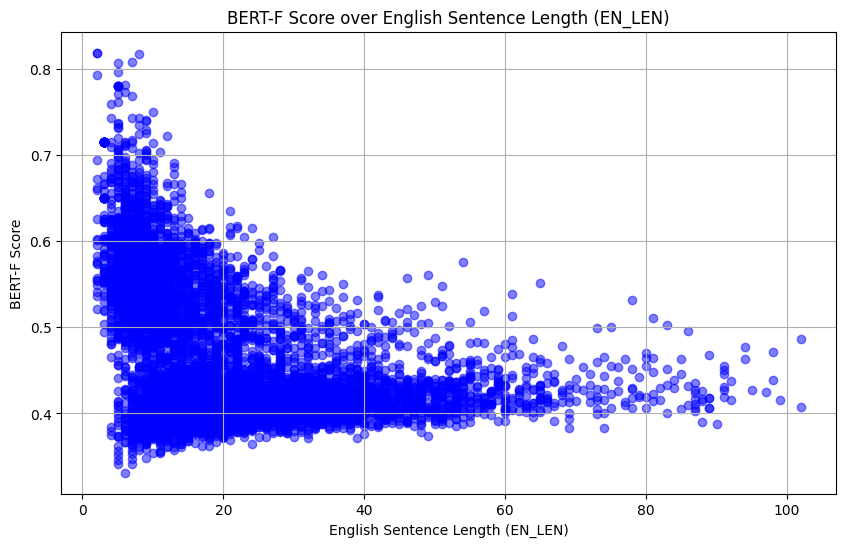

In [29]:
# Plotting BLEU scores over EN_LEN
model_data = lstm_data

plt.figure(figsize=(10, 6))
plt.scatter(model_data['EN_LEN'], model_data['BERTSCORE_F1'], color='blue', alpha=0.5)
plt.title('BERT-F Score over English Sentence Length (EN_LEN)')
plt.xlabel('English Sentence Length (EN_LEN)')
plt.ylabel('BERT-F Score')
plt.grid(True)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_9116\670176096.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_bleu_per_category = train_df.groupby('Length Category')['BLEU'].mean()


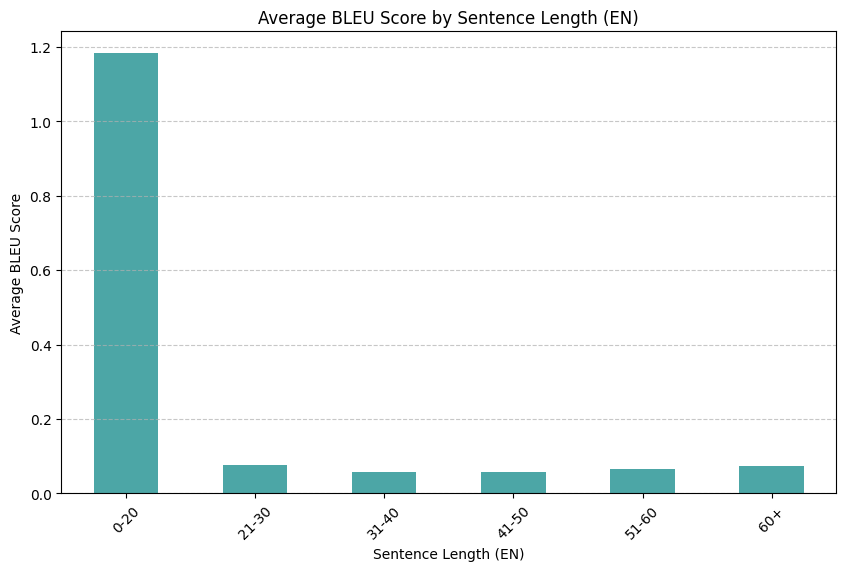

In [31]:
# Define the bins 
bins = [0, 20, 30, 40, 50, 60, float('inf')]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '60+']

# sent len to bins
train_df['Length Category'] = pd.cut(train_df['EN_LEN'], bins=bins, labels=labels, right=False)

# avg BLEU score for each bin
average_bleu_per_category = train_df.groupby('Length Category')['BLEU'].mean()

# avg BLEU scores for each bin
plt.figure(figsize=(10, 6))
average_bleu_per_category.plot(kind='bar', color='teal', alpha=0.7)
plt.title('Average BLEU Score by Sentence Length (EN)')
plt.xlabel('Sentence Length (EN)')a
plt.ylabel('Average BLEU Score')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## RNN vs Transformers vs LSTM

C:\Users\user\AppData\Local\Temp\ipykernel_3688\1343994833.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_bleu_rnn = rnn_data.groupby('Length Category')['BLEU'].mean()
C:\Users\user\AppData\Local\Temp\ipykernel_3688\1343994833.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_bleu_transformer = transformer_data.groupby('Length Category')['BLEU'].mean()
C:\Users\user\AppData\Local\Temp\ipykernel_3688\1343994833.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or ob

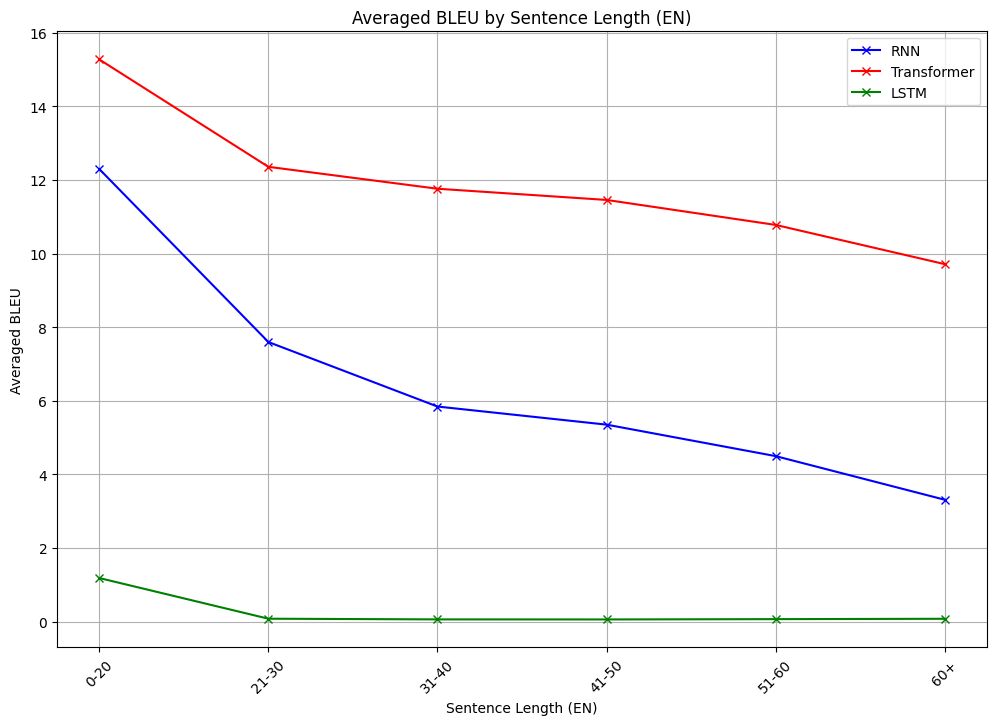

In [57]:
# Load the CSV files for both RNN and Transformer models
transformer_data_path = r'score by sentence len\230k-trnf-4-plot.csv'
rnn_data_path= r'score by sentence len\230k-rnn-4-plot.csv'
lstm_data_path= r'score by sentence len\230k-lstm-4-plot.csv'

rnn_data = pd.read_csv(rnn_data_path)
transformer_data = pd.read_csv(transformer_data_path)
lstm_data = pd.read_csv(lstm_data_path)

# repeated
bins = [0, 20, 30, 40, 50, 60, float('inf')]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '60+']

rnn_data['Length Category'] = pd.cut(rnn_data['EN_LEN'], bins=bins, labels=labels, right=False)
transformer_data['Length Category'] = pd.cut(transformer_data['EN_LEN'], bins=bins, labels=labels, right=False)
lstm_data['Length Category'] = pd.cut(lstm_data['EN_LEN'], bins=bins, labels=labels, right=False)

average_bleu_rnn = rnn_data.groupby('Length Category')['BLEU'].mean()
average_bleu_transformer = transformer_data.groupby('Length Category')['BLEU'].mean()
average_bleu_lstm = lstm_data.groupby('Length Category')['BLEU'].mean()


# Plotting the average BLEU scores for each sentence length category for both models
plt.figure(figsize=(12, 8))
plt.plot(average_bleu_rnn, label='RNN', marker='x', color='blue')
plt.plot(average_bleu_transformer, label='Transformer', marker='x', color='red')
plt.plot(average_bleu_lstm, label='LSTM', marker='x', color='green')
plt.title('Averaged BLEU by Sentence Length (EN)')
plt.xlabel('Sentence Length (EN)')
plt.ylabel('Averaged BLEU')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()



## Double check Bleu

In [9]:
from sacrebleu.metrics import BLEU, CHRF, TER
refs = [
         '让我们来看看这段视频'
       ]
sys = '让 我 们 视 频 一 些 视 频 。'

for i in range(1,5):
  print(f"{i}. BLEU-{i}")
  bleu = BLEU(smooth_method='exp', tokenize='zh', max_ngram_order=i, effective_order=True)
  print(bleu.sentence_score(sys, refs))
  print(50*'-')


1. BLEU-1
BLEU = 50.00 50.0 (BP = 1.000 ratio = 1.000 hyp_len = 10 ref_len = 10)
--------------------------------------------------
2. BLEU-2
BLEU = 40.82 50.0/33.3 (BP = 1.000 ratio = 1.000 hyp_len = 10 ref_len = 10)
--------------------------------------------------
3. BLEU-3
BLEU = 27.52 50.0/33.3/12.5 (BP = 1.000 ratio = 1.000 hyp_len = 10 ref_len = 10)
--------------------------------------------------
4. BLEU-4
BLEU = 19.64 50.0/33.3/12.5/7.1 (BP = 1.000 ratio = 1.000 hyp_len = 10 ref_len = 10)
--------------------------------------------------


In [117]:

# Load the CSV files for both RNN and Transformer models
transformer_data_path = r'score by sentence len\230k-trnf-4-plot.csv'
rnn_data_path= r'score by sentence len\230k-rnn-4-plot.csv'
lstm_data_path= r'score by sentence len\230k-lstm-4-plot.csv'

config2_df = pd.read_csv(rnn_data_path)
config1_df = pd.read_csv(transformer_data_path)
config3_df = pd.read_csv(lstm_data_path)

def view_scores_by_index(index=0):
    print(f"Len : {config1_df['EN_LEN'][index]}")
    print(f"Source : {config1_df['en'][index]}")
    print(f"Expected : {config1_df['zh'][index]}")
    print()
    print("t")
    print()
    print(f"Predicted : {config1_df['pred'][index]}")
    print(config1_df['BLEU'][index])
    print(config1_df['BERTSCORE_F1'][index])

    print()
    print("rnn")
    print()
    print(f"Predicted : {config2_df['pred'][index]}")
    print(config2_df['BLEU'][index])
    print(config2_df['BERTSCORE_F1'][index])

    # print()
    # print("lstm")
    # print()
    # print(f"Predicted : {config3_df['pred'][index]}")
    # print(config3_df['BLEU'][index])
    # print(config3_df['BERTSCORE_F1'][index])

    


In [132]:
view_scores_by_index(index=7457)#978)

Len : 66
Source : This building was already a part of this community,  and then that first summer,  when people started arriving and sharing the building on social media,  the building ceased to be just an edifice and it became media,  because these, these are not just pictures of a building,  they're your pictures of a building.
Expected : 这座建筑已经是社区的一个部分， 第一个夏天， 人们来到这里，在社交媒体上分享照片， 这个只想成为建筑物的建筑 变成了媒体， 因为这，这不仅仅是建筑的照片。 它们是你拍摄的建筑相片。

t

Predicted : 这个建筑已经是一个社区的一部分, 然后,第一年夏天, 人们开始参与这个社交媒体, 构建媒体,  ⁇ 盖了 ⁇ , 它变成了媒体, 因为这些照片,并不只是你的建筑。
20.526675324327943
0.8278400897979736

rnn

Predicted : 这 个 建 筑 已 经 已 经 成 为 的 一 部 分 的 一 部 分 , 夏 天 夏 天 开 始 , , , 开 始 , , , , , , , , , , , , , , , , , , , 照 片 , , 的 照 片 , , 照 片 的 照 片 ,
6.210888859013451
0.6601924300193787


In [123]:
for i in range(3000,3050):
    print("index", i)
    print(view_scores_by_index(index=i))


index 3000
Len : 35
Source : Eight years ago when I was at the Media Lab,  I started exploring this idea  of how to put the power of engineers  in the hands of artists and designers.
Expected : 8年前当我在媒体实验室的时候， 我开始思索 如何才能把工程师所独有的力量 也赋予艺术家和设计师。

t

Predicted : 八年前,我在媒体实验室开始探索这个想法, 我开始探索如何 把艺术家和设计师和设计师的动力
33.00752073752523
0.8070677518844604

rnn

Predicted : 八 年 前 , 当 我 媒 体 媒 体 的 时 候 ,   我 开 始 探 索   把 艺 术 家 和 艺 术 家 和 设 计 师 和 工 程 师 和 工 程 师 。
24.391482788381197
0.8011474013328552
None
index 3001
Len : 9
Source : A few years ago I started developing littleBits.
Expected : 几年前我开始开发littleBits。

t

Predicted : 几年前我开始研究小 ⁇
51.697315395717055
0.8959954977035522

rnn

Predicted : 几 年 前 , 我 开 始 开 发 了 一 些 B
38.67706276352344
0.8814598917961121
None
index 3002
Len : 8
Source : Let me show you how they work.
Expected : 我给大家演示一下是怎么玩的。

t

Predicted : 让我来展示给他们工作
3.701773936489291
0.6620567440986633

rnn

Predicted : 让 我 展 示 一 下 展 示 一 下 是 如 何 运 作 的 。
17.694975149532556
0.8241090774536133
None
index 3003

In [ ]:
#314